# Докинг низкомолекулярных лигандов в структуру белка

In [8]:
import numpy as np
import copy

# Отображение структур
import IPython.display
import ipywidgets
from IPython.display import display,display_svg,SVG,Image

# Open Drug Discovery Toolkit
import oddt
import oddt.docking
import oddt.interactions

# Органика
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [14]:
import mdtraj as md

u = md.load('ENLYS_BPT5_lig.B99990001.pdb')
pdb = u.topology

for i,r in enumerate(pdb.atoms):
    print(i,r)
    #посмотрим на атомы

0 MET1-N
1 MET1-CA
2 MET1-CB
3 MET1-CG
4 MET1-SD
5 MET1-CE
6 MET1-C
7 MET1-O
8 SER2-N
9 SER2-CA
10 SER2-CB
11 SER2-OG
12 SER2-C
13 SER2-O
14 PHE3-N
15 PHE3-CA
16 PHE3-CB
17 PHE3-CG
18 PHE3-CD1
19 PHE3-CD2
20 PHE3-CE1
21 PHE3-CE2
22 PHE3-CZ
23 PHE3-C
24 PHE3-O
25 LYS4-N
26 LYS4-CA
27 LYS4-CB
28 LYS4-CG
29 LYS4-CD
30 LYS4-CE
31 LYS4-NZ
32 LYS4-C
33 LYS4-O
34 PHE5-N
35 PHE5-CA
36 PHE5-CB
37 PHE5-CG
38 PHE5-CD1
39 PHE5-CD2
40 PHE5-CE1
41 PHE5-CE2
42 PHE5-CZ
43 PHE5-C
44 PHE5-O
45 GLY6-N
46 GLY6-CA
47 GLY6-C
48 GLY6-O
49 LYS7-N
50 LYS7-CA
51 LYS7-CB
52 LYS7-CG
53 LYS7-CD
54 LYS7-CE
55 LYS7-NZ
56 LYS7-C
57 LYS7-O
58 ASN8-N
59 ASN8-CA
60 ASN8-CB
61 ASN8-CG
62 ASN8-OD1
63 ASN8-ND2
64 ASN8-C
65 ASN8-O
66 SER9-N
67 SER9-CA
68 SER9-CB
69 SER9-OG
70 SER9-C
71 SER9-O
72 GLU10-N
73 GLU10-CA
74 GLU10-CB
75 GLU10-CG
76 GLU10-CD
77 GLU10-OE1
78 GLU10-OE2
79 GLU10-C
80 GLU10-O
81 LYS11-N
82 LYS11-CA
83 LYS11-CB
84 LYS11-CG
85 LYS11-CD
86 LYS11-CE
87 LYS11-NZ
88 LYS11-C
89 LYS11-O
90 GLN12-N
91 GLN12-CA


756 PHE97-N
757 PHE97-CA
758 PHE97-CB
759 PHE97-CG
760 PHE97-CD1
761 PHE97-CD2
762 PHE97-CE1
763 PHE97-CE2
764 PHE97-CZ
765 PHE97-C
766 PHE97-O
767 GLU98-N
768 GLU98-CA
769 GLU98-CB
770 GLU98-CG
771 GLU98-CD
772 GLU98-OE1
773 GLU98-OE2
774 GLU98-C
775 GLU98-O
776 GLN99-N
777 GLN99-CA
778 GLN99-CB
779 GLN99-CG
780 GLN99-CD
781 GLN99-OE1
782 GLN99-NE2
783 GLN99-C
784 GLN99-O
785 ALA100-N
786 ALA100-CA
787 ALA100-CB
788 ALA100-C
789 ALA100-O
790 GLY101-N
791 GLY101-CA
792 GLY101-C
793 GLY101-O
794 LYS102-N
795 LYS102-CA
796 LYS102-CB
797 LYS102-CG
798 LYS102-CD
799 LYS102-CE
800 LYS102-NZ
801 LYS102-C
802 LYS102-O
803 GLU103-N
804 GLU103-CA
805 GLU103-CB
806 GLU103-CG
807 GLU103-CD
808 GLU103-OE1
809 GLU103-OE2
810 GLU103-C
811 GLU103-O
812 LEU104-N
813 LEU104-CA
814 LEU104-CB
815 LEU104-CG
816 LEU104-CD1
817 LEU104-CD2
818 LEU104-C
819 LEU104-O
820 GLY105-N
821 GLY105-CA
822 GLY105-C
823 GLY105-O
824 ILE106-N
825 ILE106-CA
826 ILE106-CB
827 ILE106-CG1
828 ILE106-CG2
829 ILE106-CD1
830 IL

In [11]:
prot = next(oddt.toolkit.readfile('pdb','ENLYS_BPT5_lig.B99990002.pdb'))
prot.protein = True

print ('is it the first mol in 1lmp is protein?',prot.protein,':) and MW of this mol is:', prot.molwt )

is it the first mol in 1lmp is protein? True :) and MW of this mol is: 15523.601999999986


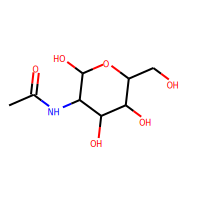

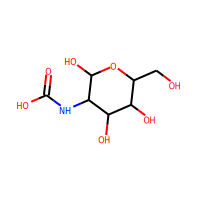

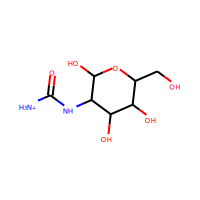

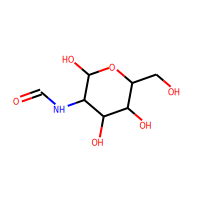

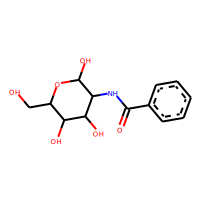

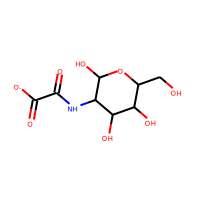

In [12]:
smiles = ["CC(=O)NC1C(O)OC(CO)C(O)C1O", "OC(=O)NC1C(O)OC(CO)C(O)C1O",
          "[NH3+]C(=O)NC1C(O)OC(CO)C(O)C1O", "C(=O)NC1C(O)OC(CO)C(O)C1O",
          "C=1(C=CC=CC1)C(=O)NC1C(O)OC(CO)C(O)C1O", "C(C([O-])=O)(=O)NC1C(O)OC(CO)C(O)C1O"] 
mols= []
images =[]

for s in smiles:
    m = oddt.toolkit.readstring('smi', s)
    if not m.Mol.HasProp('3D'): 
        m.make3D(forcefield='mmff94', steps=150)
    mols.append(m)
    images.append((SVG(copy.deepcopy(m).write('svg'))))
    
display_svg(*images)

In [13]:
#create docking object
dock_obj= oddt.docking.AutodockVina.autodock_vina(
    protein=prot,size=(20,20,20),center=[geom_center[0],geom_center[1],geom_center[2]],
    executable='/usr/bin/vina',autocleanup=True, num_modes=9)

print(dock_obj.tmp_dir)
print(" ".join(dock_obj.params))

NameError: name 'geom_center' is not defined